## Exercise 4
Let's dive into the serious business now!

### Description
[Kaggle](http://www.kagle.com/) is a great platform to learn machine learning. They offer free datasets and organize competitions around them. You can even be paid if you win one of them!

Now that you know how to build a classifier, try with [the titanic dataset!](https://www.kaggle.com/c/titanic).

### Steps
1. Download the dataset.
2. Import it in a jupyter notebook.
3. Analyse the data.
4. Divide the dataset. (train data and test data)
5. Build a classifier using the algorithm of you choice and fit it with your train data.
6. Evaluate the model with your test data.
7. When you're satisfied of the result, fit your model with the complete dataset.
8. Predic the Kaggle's test set and [submit your prediciton](https://www.kaggle.com/c/titanic/overview).
9. Which score did you get?

**DISCLAIMER:** If you look at Kaggle's leaderboard, you will see a lot of people have a score of 100%. They just found the name of people that survived online. Great lesson here, when you are learning something, never compare yourself to others. All that matters is what you've learned.

### Import libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#regex
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# evaluating
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load and explore the data

In [2]:
train_df = pd.read_csv('assets/train.csv')
test_df = pd.read_csv('assets/test.csv')
combined= train_df.append(test_df) # combined dataset

In [3]:
train_df.head(5) #extra column survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head(5) # make predictions which passengers survived based on train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
combined.dtypes #check which columns are numerical and which ones categorical
# remark some of them are alphanumerical.

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
combined.info() # is dataset representative for the whole population?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
combined.describe()
# 38% survival rate (how many % did survive?)
# Age nan values can not be O (min = 0.17)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Feature engineering

#### Title column

In [8]:
combined["Name"].head(10) # from the name we can make title feature so we can drop passengerid & name during preprocessing
# we also going to use title to fill in missing values for age

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

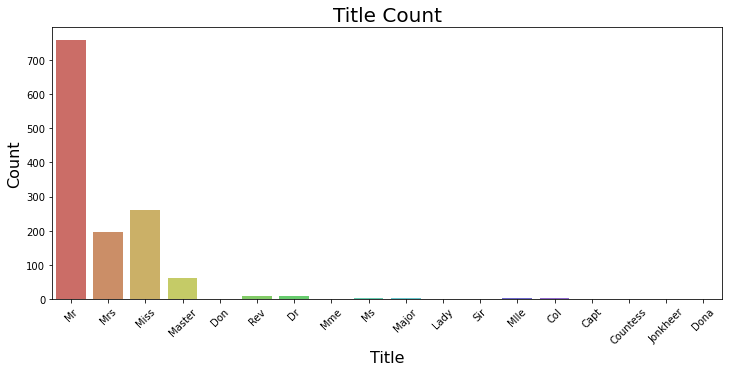

In [9]:
#GettingLooking the prefix of all Passengers
combined['Title'] = combined.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=combined, palette="hls")
plt.xlabel("Title", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Title Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()
# Most people are being spoken with Mr, followed by Miss, Mrs, Master
# Other titles are rare

In [10]:
pd.crosstab(combined['Title'], combined['Sex'])
#only the title Dr is either male or female

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [11]:
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                             'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

In [12]:
pd.crosstab(combined['Title'], combined['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Rare,4,25


In [13]:
del combined['PassengerId'] #delete unnecessary columns
del combined['Name']

In [14]:
combined.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### Is alone column

In [15]:
combined['familysize'] = combined['SibSp']+combined['Parch']+1 #number of siblings/spous + Children/parents + 1 for him/herself
del combined['SibSp']
del combined['Parch']
combined.head(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familysize
0,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,2
1,1.0,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,2
2,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,1.0,1,female,35.0,113803,53.1000,C123,S,Mrs,2
4,0.0,3,male,35.0,373450,8.0500,NaN,S,Mr,1


In [16]:
combined['familysize'].unique() #range of familysizes

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [17]:
combined['IsAlone'] = 0 #create new column with default zero (for not alone)

combined.loc[combined.familysize == 1, 'IsAlone'] = 1 #if familysize is 1 this person is alone (1)

In [18]:
del combined['familysize']

In [19]:
pd.crosstab(combined['IsAlone'], combined['Sex'])
# Most people who were alone where males on the Titanic
# followed by females who were not alone

Sex,female,male
IsAlone,,
0,272,247
1,194,596


### Data preprocessing

#### Dealing with null values

In [20]:
combined.isnull().sum() # check absolute nan values

Survived     418
Pclass         0
Sex            0
Age          263
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Title          0
IsAlone        0
dtype: int64

In [21]:
round((combined.isnull().sum()*100)/len(combined),2) # check relative nan values

Survived    31.93
Pclass       0.00
Sex          0.00
Age         20.09
Ticket       0.00
Fare         0.08
Cabin       77.46
Embarked     0.15
Title        0.00
IsAlone      0.00
dtype: float64

In [22]:
grp = combined.groupby(['Pclass','Title','Sex'])['Age'].mean() # look at mean age per pclass, title and sex
print(grp)
# the lower the class , the lower the mean age of mr and mrs for both men and woman
# there are some rare titles in second class

Pclass  Title   Sex   
1       Master  male       6.984000
        Miss    female    30.131148
        Mr      male      41.450758
        Mrs     female    42.926471
        Rare    female    42.250000
                male      49.214286
2       Master  male       2.757273
        Miss    female    20.865714
        Mr      male      32.346715
        Mrs     female    33.518519
        Rare    male      40.700000
3       Master  male       6.090000
        Miss    female    17.360874
        Mr      male      28.318910
        Mrs     female    32.326531
Name: Age, dtype: float64


In [23]:
combined['Age'].fillna(combined.groupby(['Pclass','Title','Sex'])['Age'].transform('mean'), inplace=True) # fill Age by mean

In [24]:
del combined['Cabin'] # too much missing values

In [25]:
df = combined.dropna(subset=['Fare', 'Embarked']) # drop only rows for certain columns

In [26]:
df.Survived.fillna(2, inplace=True) # fill missing values for Survived in order to split the dataset again later

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   float64
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   object 
 3   Age       1306 non-null   float64
 4   Ticket    1306 non-null   object 
 5   Fare      1306 non-null   float64
 6   Embarked  1306 non-null   object 
 7   Title     1306 non-null   object 
 8   IsAlone   1306 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 102.0+ KB


#### Make categorical features numerical

In [28]:
del df['Ticket'] # do not contribute to ML modelling

In [29]:
df.dtypes # only Sex, Embarked and Title are left for encoding

Survived    float64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
Title        object
IsAlone       int64
dtype: object

In [30]:
print(df.Sex.unique ())
print(df.Embarked.unique()) #Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
print(df.Title.unique())

['male' 'female']
['S' 'C' 'Q']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder ()

for i in df.columns:
    if df[i].dtype == object:
        df[i] = encoder.fit_transform(df[i])
print(df.Sex.unique ())
print(df.Embarked.unique())
print(df.Title.unique())

[1 0]
[2 0 1]
[2 3 1 0 4]


### Split the combined dataset back into training and testdata

In [32]:
df1 = df[df['Survived'] <= 1]
df1.info() # new training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    int64  
 6   Title     889 non-null    int64  
 7   IsAlone   889 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [33]:
df2 = df[df['Survived'] == 2]
df2.info() # new test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    float64
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int64  
 3   Age       417 non-null    float64
 4   Fare      417 non-null    float64
 5   Embarked  417 non-null    int64  
 6   Title     417 non-null    int64  
 7   IsAlone   417 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 29.3 KB


In [34]:
del df2['Survived'] # drop survived column for test data like originally

### Data visualizations

#### General analysis: plot each feature against Surived

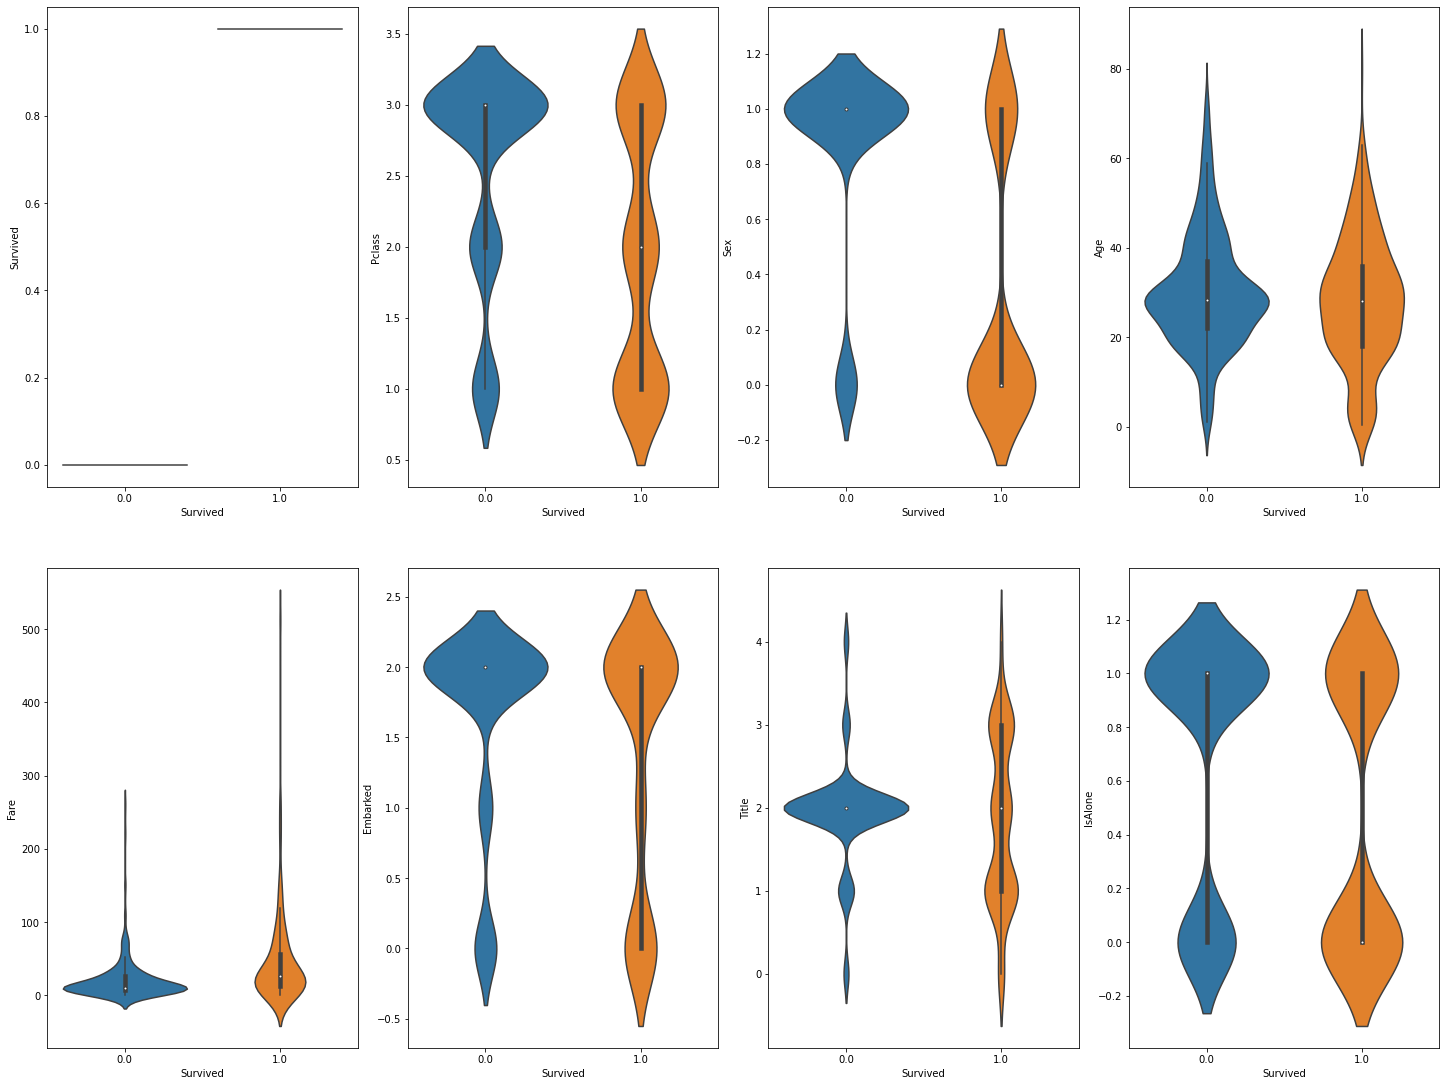

In [164]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.violinplot(x = 'Survived', y=k, data=df1, ax=axs[index]) # the violin plot shows the full distribution of the data
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# People from pclass 3 died the most
# Females survived the most
# Distribution for deaths is more centred between the range of 18 and 40 in terms of age
# Distribution for deaths is more centred close to 0 in terms of fare
# Most people embarked at Southhampton , this port has the highest amount of deaths and survivors
# Most people who died were titled Mr. , there is a spreadage of people who survived with respect for their title
# Most people who were alone died, most people who weren't alone survived

#### How well does each feature correlate with 'Survived'

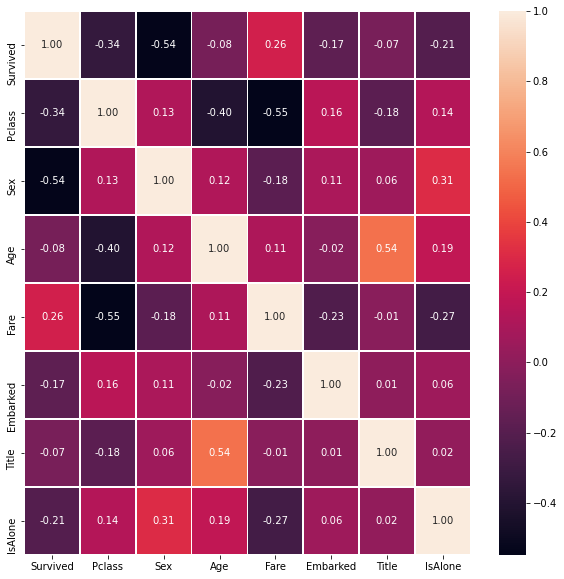

In [166]:
#correlation map view
df1.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df1.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
# some features (Sex and Pclass) correlate high with target
# All features correlate high with Pclass

#### In depth analysis

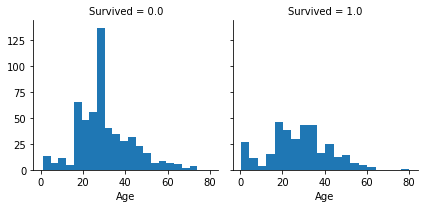

In [167]:
age = df1[['Age', 'Survived']] #Survival (0 = No; 1 = Yes)
age = age.sort_values(by='Age')

a = sns.FacetGrid(age, col='Survived')
a.map(plt.hist, 'Age', bins=20)
plt.show()

# more people died then survived
# both histogram show a right skew meaning most people were between age [18,40] that either died or survived
# more children survived then died
# less people between the age of [60,80] survived

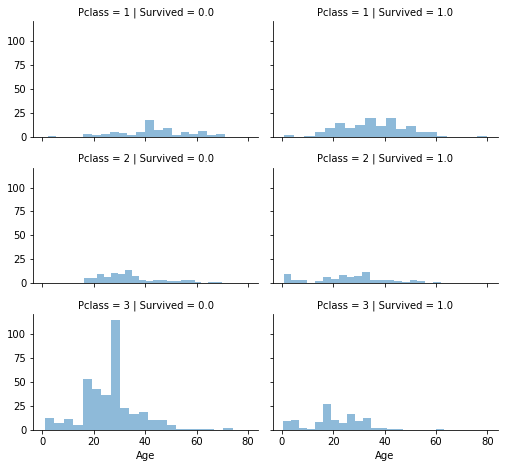

In [168]:
pclass = df1[['Pclass', 'Age','Sex','Survived']] # Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
pclass = pclass.sort_values(by='Pclass')

grid = sns.FacetGrid(pclass, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# mostly people aged between [18 - 50] from Pclass 3 died
# more people from Pclass 1 survived then died

# include pclass feature in model training

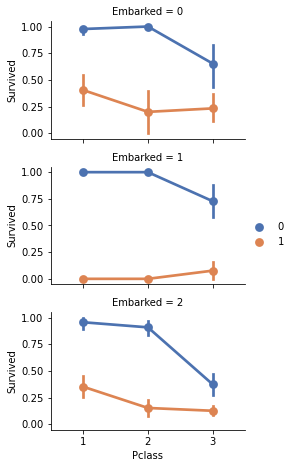

In [169]:
embarked = df1[['Embarked','Sex', 'Survived','Pclass']] # 0 = female ; 1 = male
embarked = embarked.sort_values(by='Embarked') # Cherbourg = 0; Queenstown = 1; Southampton = 2

grid = sns.FacetGrid(embarked, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

# Pclass 1: males have a higher survival rate when they embarked Cherbourg and Southampton then in Queenstown
# Pclass 1: females have the highest survival rate, regardless which port they embarked
# Pclass 2: males who embarked at Cherbourg and Southampton have a higher survival rate then Queenstown, but less then Pclass1
# Pclass 2: females have the highest survival rate when they embarked in C and Q, females embarked in S a bit less
# Pclass 3: females embarked in Q have the highest survival rate, following C and then S
# Pclass 3: males have overall the lowest survival rate , regardless of where they embarked
# Interesting: Males from pclass 3 tend to have a higher survival rate in Q then from pclass 1 & 2 (what happened?)

# include sex and embarked feature in model training

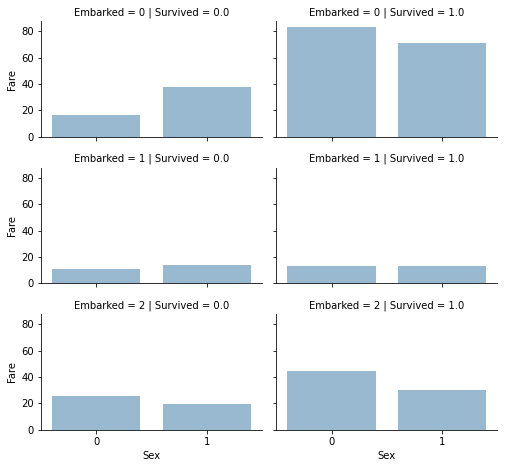

In [170]:
fare = df1[['Fare', 'Sex', 'Embarked', 'Survived']]
fare = fare.sort_values(by='Fare')

grid = sns.FacetGrid(df1, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

# people who survived and embarked in C paid the highest fares
# same for S
# in Q fare did not make a difference
# Mostly females who survived paid the highest fare (for C, S) not for Q
# Remark: men who died paid a higher fare in C then females who died

# Include fare in model

### Classification

1. Logistic Regression
2. SVM
3. kNN
4. Naive Bayes classifier
3. Decision Tree
4. Random Forest
5. Artificial neural network

#### Create X and y variabels

In [35]:
df1.shape, df2.shape

((889, 8), (417, 7))

In [36]:
X_train = df1.drop("Survived", axis=1) #try to figure out y_test
y_train = df1["Survived"]
X_test  = df2
X_train.shape, y_train.shape, X_test.shape

((889, 7), (889,), (417, 7))

#### Scale features

In [37]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Logistic Regression

In [48]:
# Grid search hyperparameters for LR
param_grid = [{'penalty' : ['l1', 'l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' : ['liblinear', 'saga']}]
lg_clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
lg_clf.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             scoring='roc_auc', verbose=1)

In [49]:
lg_clf.best_params_, lg_clf.best_score_

({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.8453728597360547)

In [46]:
# Fit, predict & return LR score

logreg = LogisticRegression(C=1, penalty= 'l1', solver= ('liblinear')) #liblinear for small datasets
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

79.75

#### Support Vector Machines

In [ ]:
#Grid search hyperparameters for SVM

param_grid = [{'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'],
               'probability':[True,False],'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],
               'degree':[3,4,10]}]
scv_clf = GridSearchCV(SVC(), param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)
scv_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6108 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7068 tasks      | elapsed: 11.5min


In [38]:
scv_clf.best_params_, scv_clf.best_score_

NameError: name 'scv_clf' is not defined

In [39]:
# Fit, predict & return SVC score

svc = SVC(C= .9, decision_function_shape= 'ovo',degree=3, gamma= 'auto',kernel= 'rbf',probability=True,
          random_state= 0)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
acc_svc = round(svc.score(X_train_scaled, y_train) * 100, 2)
acc_svc

83.8

#### kNN

In [63]:
#Grid search hyperparameters for kNN

k_range = list(range(1,20))
weights_options = ['uniform','distance']
leaf_size=list(range(1,50,5))
param_grid = [dict(n_neighbors=k_range, weights = weights_options, leaf_size=leaf_size)]
knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall', verbose=1,n_jobs=-1)
knn_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1900 out of 1900 | elapsed:   10.2s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'weights': ['uniform', 'distance']}],
             scoring='recall', verbose=1)

In [64]:
knn_clf.best_params_, knn_clf.best_score_

({'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}, 0.7264705882352941)

In [41]:
# Fit, predict & return kNN score

knn = KNeighborsClassifier(leaf_size=1, n_neighbors= 9, weights= 'distance')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = round(knn.score(X_train_scaled, y_train) * 100, 2)
acc_knn

98.43

#### Gaussian Naive Bayes



In [42]:
# Fit, predict & return GaussianNB score (No hyperparameters to tune)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.73

#### Decision Tree

In [72]:
#Grid search hyperparameters for DT

param_grid = [{'criterion':('gini', 'entropy'), 'max_depth':range(1,30),'min_samples_split': range(1,20),
               'min_samples_leaf':range(1,5)}]
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='recall', 
                      verbose=1, n_jobs=-1)
dt_clf.fit(X_train, y_train)

Fitting 5 folds for each of 4408 candidates, totalling 22040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 9800 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 14200 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 19400 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 22040 out of 22040 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ('gini', 'entropy'),
                          'max_depth': range(1, 30),
                          'min_samples_leaf': range(1, 5),
                          'min_samples_split': range(1, 20)}],
             scoring='recall', verbose=1)

In [73]:
dt_clf.best_params_, dt_clf.best_score_

({'criterion': 'gini',
  'max_depth': 18,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.7176470588235294)

In [43]:
# Fit, predict & return DT score 

decision_tree = DecisionTreeClassifier(criterion= 'gini',max_depth= 18,min_samples_leaf= 1,
                                       min_samples_split= 2)
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_test_scaled)
acc_decision_tree = round(decision_tree.score(X_train_scaled, y_train) * 100, 2)
acc_decision_tree

98.2

#### Random Forest

In [63]:
#Grid search hyperparameters for RF

param_grid = {'n_estimators': [100,50], 'max_features': [7,'auto',None], 'min_samples_leaf': [2,4,], 
              'random_state':[1,7,],'min_samples_split':[2,6,], 'oob_score': [True,False],
              'criterion': ['gini'], 'warm_start': [True,False]}

rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_features': [7, 'auto', None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 6], 'n_estimators': [100, 50],
                         'oob_score': [True, False], 'random_state': [1, 7],
                         'warm_start': [True, False]},
             scoring='recall', verbose=1)

In [64]:
rf_clf.best_params_, rf_clf.best_score_

({'criterion': 'gini',
  'max_features': 7,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 100,
  'oob_score': True,
  'random_state': 1,
  'warm_start': True},
 0.7352941176470588)

In [44]:
# Fit, predict & return RT score 

random_forest = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',
                                       min_samples_leaf=2,min_samples_split=2, n_estimators=100,
                                      oob_score=True,warm_start=True,random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

91.45

### Model evaluation

In [47]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,98.43
5,Decision Tree,98.20
3,Random Forest,91.45
0,Support Vector Machines,83.80
2,Logistic Regression,79.75
4,Naive Bayes,77.73


In [49]:
df2['Survived']=y_pred_knn

In [50]:
df2.head(5)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Survived
0,3,1,34.5,7.8292,1,2,1,0.0
1,3,0,47.0,7.0000,2,3,0,0.0
2,2,1,62.0,9.6875,1,2,1,0.0
3,3,1,27.0,8.6625,2,2,1,1.0
4,3,0,22.0,12.2875,2,3,0,1.0
